In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
path = '/content/drive/My Drive/custom_data/'

In [ ]:
import pandas as pd
ori_export = pd.read_csv(path+'exports.csv')
ori_umcsent = pd.read_csv(path+'UMCSENT.csv', skiprows= 10 ,dtype = {'observation_date':str,'UMCSENT':float})
ori_epu = pd.read_csv(path+'EPU.csv')

In [ ]:
for i in ori_export.columns:
  if i != '기간':
    ori_export[i] = pd.to_numeric(ori_export[i].str.replace(pat=r'[^A-Za-z0-9]', repl= '', regex=True),downcast='float')

In [ ]:
f1 = ori_epu['Three_Component_Index'][180:430]
f1.index = np.arange(0,250)
trn_y = ori_export['수출금액'][1:251]
trn_y.index = np.arange(0,250)
DATA = pd.concat([ori_umcsent['UMCSENT'][:250],f1,trn_y],axis=1,ignore_index=True)
DATA.index = ori_export['기간'][1:251]

0~1 로 스케일링

In [ ]:
DATA.head()

,0,1,2
기간,,,
2000.01,112.0,89.201538,12162425.0
2000.02,111.3,77.601395,12676042.0
2000.03,107.1,77.548309,14429703.0
2000.04,109.2,76.059227,13522040.0
2000.05,110.7,97.986206,14636755.0


In [ ]:
def scaling(x):
  min_max_scaler = MinMaxScaler()
  df = x.copy()
  fitted = min_max_scaler.fit(x)
  output = min_max_scaler.transform(x)
  output = pd.DataFrame(output, columns=df.columns, index=list(df.index.values))
  return output

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X = scaling(DATA)

In [ ]:
X.describe()

,0,1,2
count,250.000000,250.000000,250.000000
mean,0.534998,0.215624,0.526546
std,0.215383,0.152158,0.294877
min,0.000000,0.000000,0.000000
25%,0.369489,0.111933,0.273633
50%,0.582892,0.179071,0.603650
75%,0.694885,0.284004,0.792516
max,1.000000,1.000000,1.000000


In [ ]:
from statsmodels.tsa.stattools import adfuller
adfuller_test = adfuller(X[0], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))
adfuller_test = adfuller(X[1], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))
adfuller_test = adfuller(X[2], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ADF test statistic: -2.7690603873702404
p-value: 0.06283098519406402
ADF test statistic: -1.7315018532728015
p-value: 0.4149591965453194
ADF test statistic: -1.565982786529285
p-value: 0.500655329231368


In [ ]:
mydata_diff = X.diff().dropna()

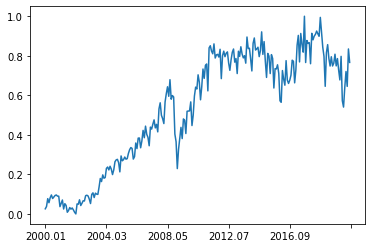

In [ ]:
X[2].plot()

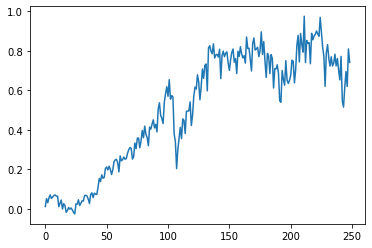

In [ ]:
plot_data = mydata_diff[2]
plt.plot(plot_data.values.cumsum())

In [ ]:
adfuller_test = adfuller(mydata_diff[0], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))
adfuller_test = adfuller(mydata_diff[1], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))
adfuller_test = adfuller(mydata_diff[2], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -9.144293139335463
p-value: 2.794916487406929e-15
ADF test statistic: -8.102436501954516
p-value: 1.289056204362729e-12
ADF test statistic: -3.869404114198044
p-value: 0.002271917208128231


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import statsmodels.api as sm
from statsmodels.tsa.api import VAR

In [ ]:
forecasting_model = VAR(mydata_diff[:149])
results_aic = []
for p in range(1,10):
  results = forecasting_model.fit(p)
  results_aic.append(results.aic)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


# 과정과 결과

In [ ]:
results_tst = []
results_all = []
for i in range(20):
  forecasting_model = VAR(X[50+5*i:150+5*i])
  results = forecasting_model.fit(5)
  forecast_interval = results.forecast_interval(y=X.values[150+5*i-5:150+5*i],steps=5)
  results_all.append(forecast_interval)
  results_tst.append(forecast_interval[2])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-

In [ ]:
results_all = np.array(results_all)
results_all.shape

(20, 3, 5, 3)

In [ ]:
results_tst = np.array(results_tst)
print(results_tst.shape)

(20, 5, 3)


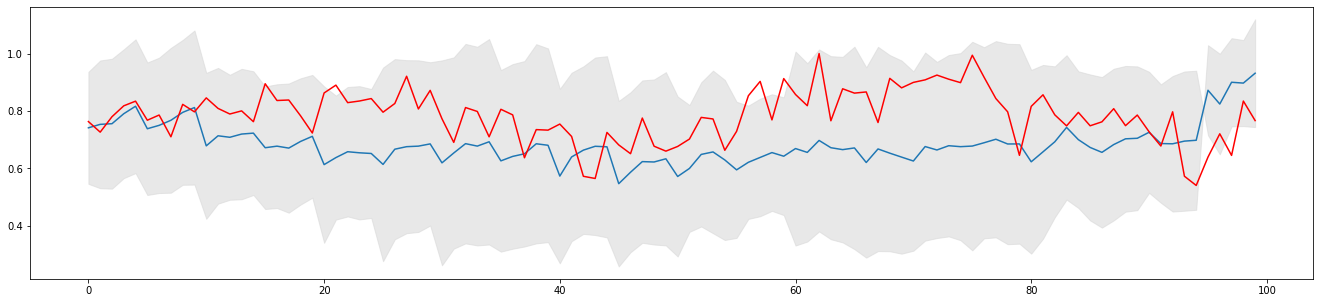

In [ ]:
results_var = results_tst.copy()
results_var = results_var.reshape(-1,3)
days = np.arange(100)
MU = results_var[:,0]#.cumsum(axis=0) + X[2].values[149]
U = results_var[:,2]#.cumsum(axis=0) + X[2].values[149]
L = results_var[:,1]#.cumsum(axis=0) + X[2].values[149]
MU2 = (U+L)/2
Y = X[2].values[-100:]
plt.figure(figsize=(23,5))
plt.plot(days,MU2,days,Y,'r')
plt.fill_between(days, L, U, color='lightgray', alpha=0.5)
plt.show()

In [ ]:
np.savetxt(path+'VAR_L.txt', L, fmt='%.6f', delimiter=',')
np.savetxt(path+'VAR_U.txt', U, fmt='%.6f', delimiter=',')
np.savetxt(path+'VAR_MU.txt', MU2, fmt='%.6f', delimiter=',')

Construct forecast interval estimates assuming the y are Gaussian